#  Text Sentiment Analysis
## Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the text sentiment classification dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")



## 1. Data Loading and Initial Exploration

In [2]:
# Load the datasets
train_df = pd.read_csv('/kaggle/input/emotions-analysis/train.csv')
test_df = pd.read_csv('/kaggle/input/emotions-analysis/test.csv')

print(" Dataset Overview")
print("="*50)
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print("\n Training Data Info:")
print(train_df.info())
print("\n Test Data Info:")
print(test_df.info())

 Dataset Overview
Training set shape: (7633, 3)
Test set shape: (5205, 2)

 Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633 entries, 0 to 7632
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         7633 non-null   int64 
 1   text       7633 non-null   object
 2   sentiment  7632 non-null   object
dtypes: int64(1), object(2)
memory usage: 179.0+ KB
None

 Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5205 non-null   int64 
 1   text    5205 non-null   object
dtypes: int64(1), object(1)
memory usage: 81.5+ KB
None


In [3]:
# Display first few rows
print(" First 5 rows of Training Data:")
print(train_df.head())
print("\n First 5 rows of Test Data:")
print(test_df.head())

# Check columns
print(f"\n Training data columns: {list(train_df.columns)}")
print(f" Test data columns: {list(test_df.columns)}")

 First 5 rows of Training Data:
   id                                               text sentiment
0   0  Extremely easy user interface. Helpsnin using ...  positive
1   1   Hey Luis, thanks!  I have Flash and my prof`s...  positive
2   2   For sure you should continue to Tweet WHILE o...  negative
3   3                    on the phone w. Chantellie ! <3   neutral
4   4  Clunky and very slow to load. Not fun at all -...  negative

 First 5 rows of Test Data:
   id                                               text
0   0  with harry.. baked. love you cassie.. BUT YOU`...
1   1  RT @LATimesautos is now the time to buy a GM c...
2   2  skyping with katie  & Allison yeah boy katies ...
3   3  the downside of getting TDL 3 days early is th...
4   4  _zulu or get up on that Michael Jackson ish.  ...

 Training data columns: ['id', 'text', 'sentiment']
 Test data columns: ['id', 'text']


In [4]:
# Check for missing values
print(" Missing Values Analysis:")
print("="*30)
print("Training Data:")
print(train_df.isnull().sum())
print("\nTest Data:")
print(test_df.isnull().sum())

# Check for duplicates
print(f"\n Duplicate rows in training data: {train_df.duplicated().sum()}")
print(f" Duplicate rows in test data: {test_df.duplicated().sum()}")

# Check unique values in sentiment column (only for training data)
if 'sentiment' in train_df.columns:
    print(f"\n Unique sentiments (before cleaning): {train_df['sentiment'].unique()}")
    print(f"Number of unique sentiments: {train_df['sentiment'].nunique()}")
    
    # Check for missing sentiment values
    missing_sentiment_count = train_df['sentiment'].isnull().sum()
    if missing_sentiment_count > 0:
        print(f" Missing sentiment values: {missing_sentiment_count}")
        print("These will be handled during preprocessing...")
    else:
        print(" No missing sentiment values")

 Missing Values Analysis:
Training Data:
id           0
text         0
sentiment    1
dtype: int64

Test Data:
id      0
text    0
dtype: int64

 Duplicate rows in training data: 0
 Duplicate rows in test data: 0

 Unique sentiments (before cleaning): ['positive' 'negative' 'neutral' nan]
Number of unique sentiments: 3
 Missing sentiment values: 1
These will be handled during preprocessing...


## 2. Target Variable Analysis (Sentiment Distribution)

 Sentiment Distribution:
sentiment
neutral     2896
positive    2513
negative    2223
Name: count, dtype: int64

Percentages:
sentiment
neutral     37.945493
positive    32.927149
negative    29.127358
Name: proportion, dtype: float64


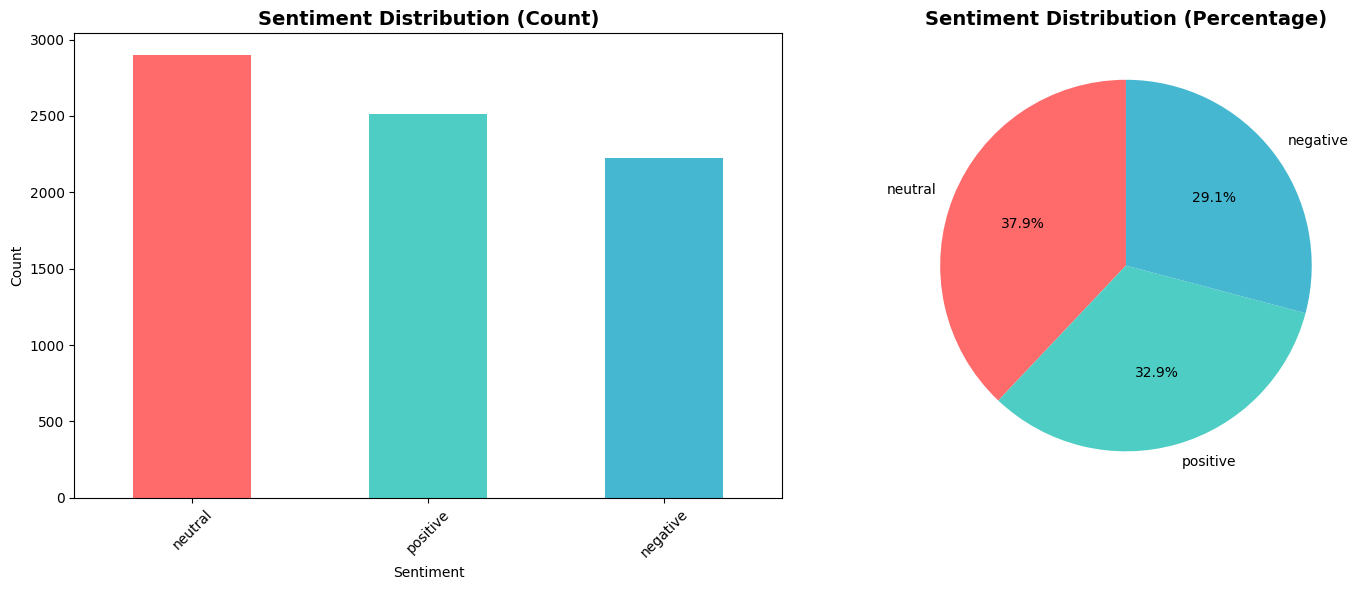

In [5]:
# Analyze sentiment distribution
if 'sentiment' in train_df.columns:
    sentiment_counts = train_df['sentiment'].value_counts()
    print(" Sentiment Distribution:")
    print(sentiment_counts)
    print(f"\nPercentages:")
    print(train_df['sentiment'].value_counts(normalize=True) * 100)

    # Visualize sentiment distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Bar plot
    sentiment_counts.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax1.set_title('Sentiment Distribution (Count)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Sentiment')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)

    # Pie chart
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
    ax2.set_title('Sentiment Distribution (Percentage)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("No sentiment column found in training data")

## 3. Text Length Analysis

In [6]:
# Calculate text statistics
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()
test_df['text_length'] = test_df['text'].str.len()
test_df['word_count'] = test_df['text'].str.split().str.len()

print(" Text Length Statistics:")
print("="*30)
print("Training Data:")
print(train_df[['text_length', 'word_count']].describe())
print("\nTest Data:")
print(test_df[['text_length', 'word_count']].describe())

 Text Length Statistics:
Training Data:
       text_length   word_count
count  7633.000000  7633.000000
mean    101.981266    13.721473
std     128.211564    13.304656
min       1.000000     1.000000
25%      41.000000     6.000000
50%      71.000000    11.000000
75%     112.000000    18.000000
max    2989.000000   158.000000

Test Data:
       text_length   word_count
count  5205.000000  5205.000000
mean     97.621326    18.384630
std      95.555372    18.116425
min       2.000000     1.000000
25%      41.000000     8.000000
50%      73.000000    14.000000
75%     116.000000    22.000000
max    1005.000000   189.000000


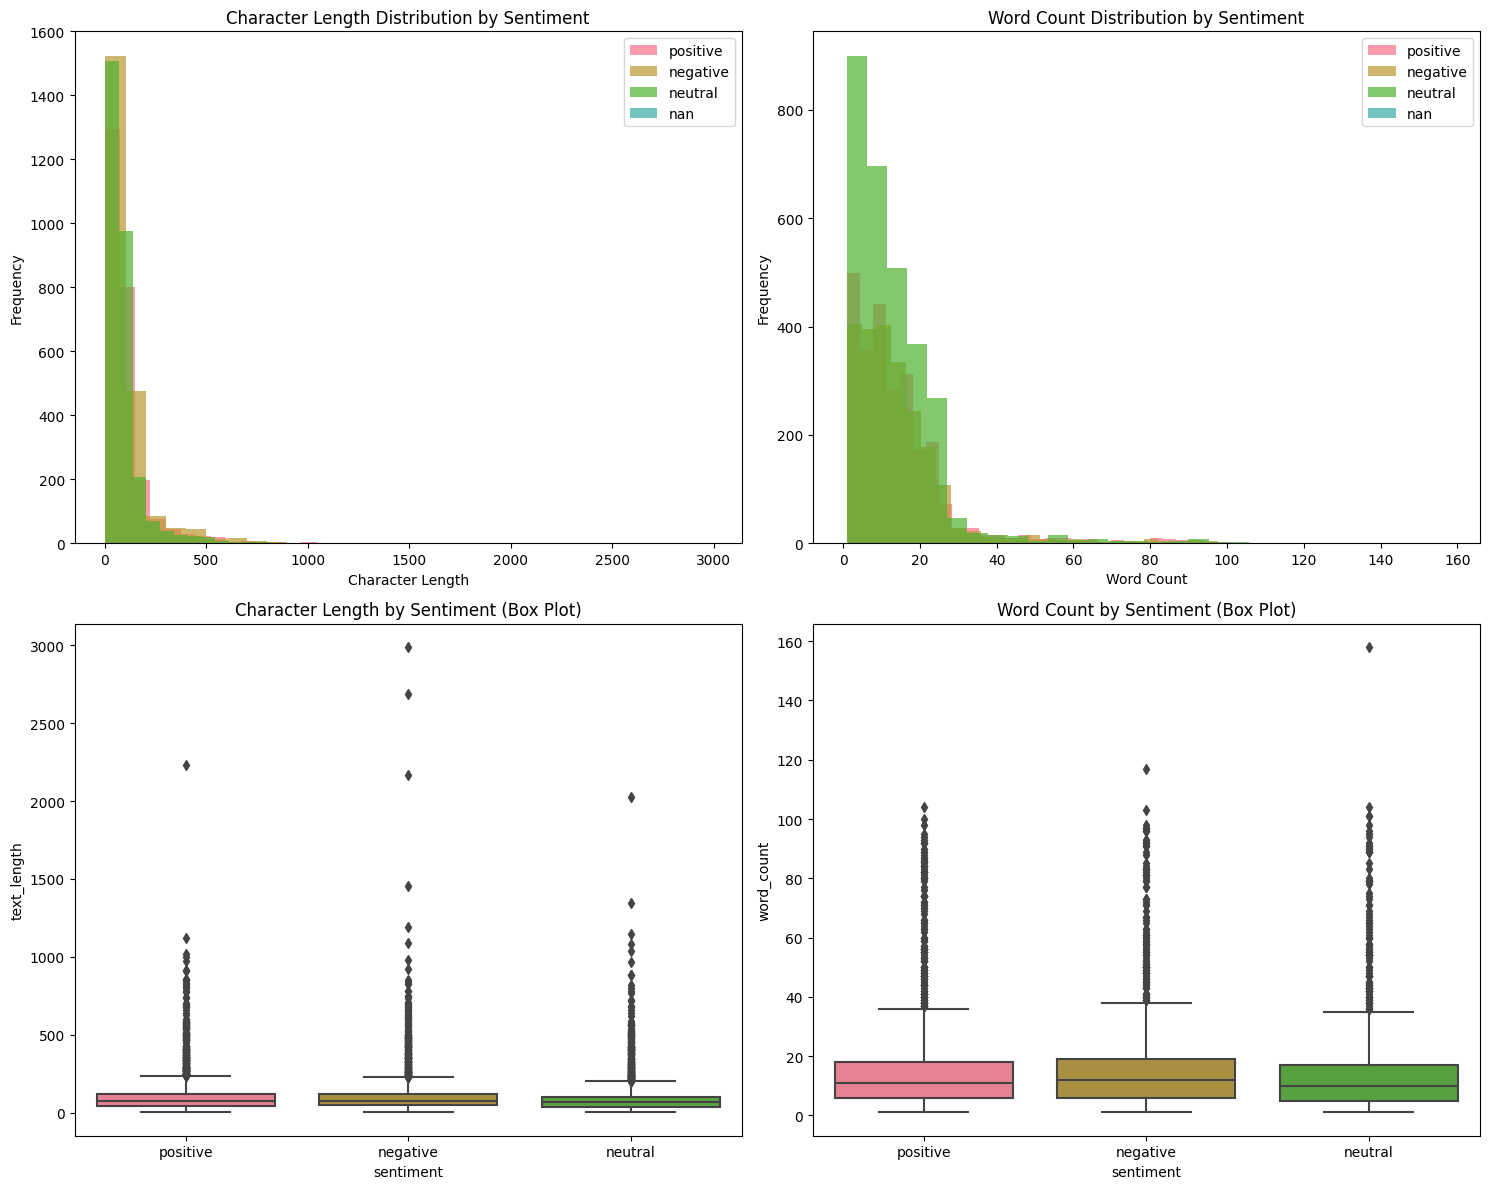

In [7]:
# Visualize text length distribution by sentiment
if 'sentiment' in train_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Character length distribution
    for sentiment in train_df['sentiment'].unique():
        subset = train_df[train_df['sentiment'] == sentiment]
        axes[0, 0].hist(subset['text_length'], alpha=0.7, label=sentiment, bins=30)
    axes[0, 0].set_title('Character Length Distribution by Sentiment')
    axes[0, 0].set_xlabel('Character Length')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()

    # Word count distribution
    for sentiment in train_df['sentiment'].unique():
        subset = train_df[train_df['sentiment'] == sentiment]
        axes[0, 1].hist(subset['word_count'], alpha=0.7, label=sentiment, bins=30)
    axes[0, 1].set_title('Word Count Distribution by Sentiment')
    axes[0, 1].set_xlabel('Word Count')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()

    # Box plots
    sns.boxplot(data=train_df, x='sentiment', y='text_length', ax=axes[1, 0])
    axes[1, 0].set_title('Character Length by Sentiment (Box Plot)')

    sns.boxplot(data=train_df, x='sentiment', y='word_count', ax=axes[1, 1])
    axes[1, 1].set_title('Word Count by Sentiment (Box Plot)')

    plt.tight_layout()
    plt.show()

## 4. Text Content Analysis

In [8]:
# Function to clean text for analysis
def clean_text_for_analysis(text):
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return text

# Sample some texts to see patterns
print(" Sample Texts by Sentiment:")
print("="*50)
if 'sentiment' in train_df.columns:
    for sentiment in train_df['sentiment'].unique():
        print(f"\n{sentiment} Examples:")
        samples = train_df[train_df['sentiment'] == sentiment]['text'].head(3)
        for i, text in enumerate(samples, 1):
            print(f"{i}. {text[:100]}...")

 Sample Texts by Sentiment:

positive Examples:
1. Extremely easy user interface. Helpsnin using the app more and note the goals....
2.  Hey Luis, thanks!  I have Flash and my prof`s code to thank for that.  *cough*...
3. i love it it's perfect! i used it in the past and i really like the new aesthetic changes and some a...

negative Examples:
1.  For sure you should continue to Tweet WHILE on conf call, WHILE worrying about cat and bee....
2. Clunky and very slow to load. Not fun at all - just yet another task I had to deal with daily....
3. i# still# have@#@ a# very@$ depressed& feline@@# fuzzball$#...it$$#`s@$# another&& trip& to& vet& tm...

neutral Examples:
1. on the phone w. Chantellie ! <3...
2. Why didn`t my favorite spotters last tweet go to my phone...
3. Guess I`ll take a nap...

nan Examples:


In [9]:
# Most common words by sentiment
def get_most_common_words(texts, n=20):
    all_words = []
    for text in texts:
        cleaned = clean_text_for_analysis(str(text))
        words = cleaned.split()
        # Filter out very short words
        words = [word for word in words if len(word) > 2]
        all_words.extend(words)
    return Counter(all_words).most_common(n)

print(" Most Common Words by Sentiment:")
print("="*40)
if 'sentiment' in train_df.columns:
    for sentiment in train_df['sentiment'].unique():
        texts = train_df[train_df['sentiment'] == sentiment]['text']
        common_words = get_most_common_words(texts, 15)

        for word, count in common_words:
            print(f"  {word}: {count}")

 Most Common Words by Sentiment:
  the: 1107
  you: 560
  and: 553
  for: 463
  good: 300
  day: 272
  app: 271
  love: 261
  this: 254
  its: 242
  have: 238
  but: 237
  with: 227
  that: 219
  great: 193
  the: 933
  and: 493
  for: 319
  you: 318
  not: 314
  this: 252
  but: 224
  have: 223
  that: 215
  its: 199
  app: 188
  just: 167
  with: 162
  now: 150
  dont: 145
  the: 1084
  and: 516
  you: 456
  for: 395
  but: 356
  not: 269
  have: 266
  this: 234
  its: 230
  that: 225
  with: 222
  just: 216
  app: 187
  was: 167
  get: 151


## 5. Comparative Analysis: Train vs Test

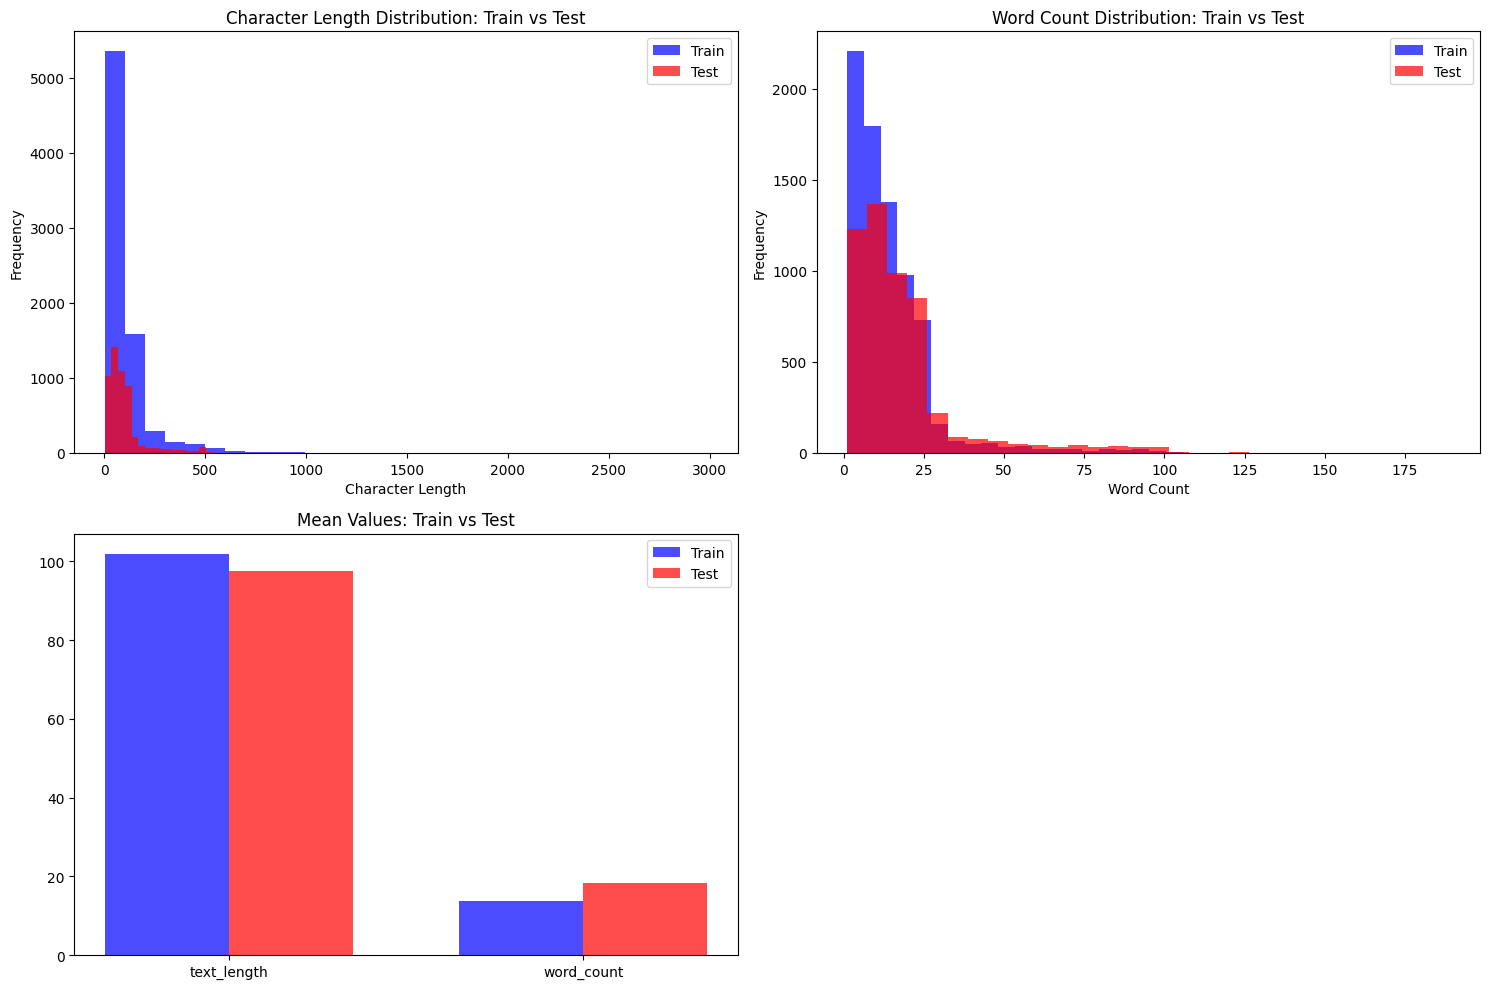

In [10]:
# Compare distributions between train and test
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Character length comparison
axes[0, 0].hist(train_df['text_length'], alpha=0.7, label='Train', bins=30, color='blue')
axes[0, 0].hist(test_df['text_length'], alpha=0.7, label='Test', bins=30, color='red')
axes[0, 0].set_title('Character Length Distribution: Train vs Test')
axes[0, 0].set_xlabel('Character Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Word count comparison
axes[0, 1].hist(train_df['word_count'], alpha=0.7, label='Train', bins=30, color='blue')
axes[0, 1].hist(test_df['word_count'], alpha=0.7, label='Test', bins=30, color='red')
axes[0, 1].set_title('Word Count Distribution: Train vs Test')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Statistical comparison
train_stats = train_df[['text_length', 'word_count']].describe()
test_stats = test_df[['text_length', 'word_count']].describe()

# Plot means comparison
metrics = ['text_length', 'word_count']
train_means = [train_stats.loc['mean', metric] for metric in metrics]
test_means = [test_stats.loc['mean', metric] for metric in metrics]

x = np.arange(len(metrics))
width = 0.35

axes[1, 0].bar(x - width/2, train_means, width, label='Train', color='blue', alpha=0.7)
axes[1, 0].bar(x + width/2, test_means, width, label='Test', color='red', alpha=0.7)
axes[1, 0].set_title('Mean Values: Train vs Test')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics)
axes[1, 0].legend()

# Remove the last subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

In [11]:
# Summary statistics comparison
print(" Train vs Test Statistics Comparison:")
print("="*50)
print("\nCharacter Length:")
print(f"Train - Mean: {train_df['text_length'].mean():.2f}, Std: {train_df['text_length'].std():.2f}")
print(f"Test  - Mean: {test_df['text_length'].mean():.2f}, Std: {test_df['text_length'].std():.2f}")

print("\nWord Count:")
print(f"Train - Mean: {train_df['word_count'].mean():.2f}, Std: {train_df['word_count'].std():.2f}")
print(f"Test  - Mean: {test_df['word_count'].mean():.2f}, Std: {test_df['word_count'].std():.2f}")

# Check for data quality issues
print("\n Data Quality Assessment:")
print("="*30)

# Check for very short texts
short_texts_train = train_df[train_df['text_length'] < 10]
short_texts_test = test_df[test_df['text_length'] < 10]
print(f"Very short texts (< 10 chars) - Train: {len(short_texts_train)}, Test: {len(short_texts_test)}")

# Check for very long texts
long_texts_train = train_df[train_df['text_length'] > 500]
long_texts_test = test_df[test_df['text_length'] > 500]
print(f"Very long texts (> 500 chars) - Train: {len(long_texts_train)}, Test: {len(long_texts_test)}")

 Train vs Test Statistics Comparison:

Character Length:
Train - Mean: 101.98, Std: 128.21
Test  - Mean: 97.62, Std: 95.56

Word Count:
Train - Mean: 13.72, Std: 13.30
Test  - Mean: 18.38, Std: 18.12

 Data Quality Assessment:
Very short texts (< 10 chars) - Train: 110, Test: 70
Very long texts (> 500 chars) - Train: 136, Test: 18


## 6. Key Insights and Recommendations

In [12]:
print(" KEY INSIGHTS FROM EDA:")
print("="*50)
print(f"1. Dataset Size: {train_df.shape[0]} training samples, {test_df.shape[0]} test samples")

if 'sentiment' in train_df.columns:
    print(f"2. Sentiment Distribution:")
    for sentiment, count in train_df['sentiment'].value_counts().items():
        percentage = (count / len(train_df)) * 100
        print(f"   - {sentiment}: {count} ({percentage:.1f}%)")

print(f"\n3. Text Characteristics:")
print(f"   - Average text length: {train_df['text_length'].mean():.1f} characters")
print(f"   - Average word count: {train_df['word_count'].mean():.1f} words")
print(f"   - Text length range: {train_df['text_length'].min()} - {train_df['text_length'].max()} characters")

print(f"\n4. Data Quality:")
print(f"   - Missing values: {train_df.isnull().sum().sum()} in train, {test_df.isnull().sum().sum()} in test")
print(f"   - Duplicates: {train_df.duplicated().sum()} in train, {test_df.duplicated().sum()} in test")

print(f"\n5. Train vs Test Comparison:")
print(f"   - Text length difference: {abs(train_df['text_length'].mean() - test_df['text_length'].mean()):.2f} chars")
print(f"   - Word count difference: {abs(train_df['word_count'].mean() - test_df['word_count'].mean()):.2f} words")

print(f"\n RECOMMENDATIONS:")
print("="*30)
print("1. Text Preprocessing:")
print("   - Remove special characters and normalize text")
print("   - Handle case sensitivity")
print("   - Consider removing very short/long texts if they're outliers")

print("\n2.  Feature Engineering:")
print("   - Extract text length and word count as features")
print("   - Consider TF-IDF or word embeddings")
print("   - Analyze n-grams for sentiment patterns")

print("\n3.  Model Considerations:")
if 'sentiment' in train_df.columns:
    sentiment_counts = train_df['sentiment'].value_counts()
    is_balanced = max(sentiment_counts) / min(sentiment_counts) < 2
    if not is_balanced:
        print("   - Handle class imbalance with sampling techniques")
    else:
        print("   - Classes are reasonably balanced")
print("   - Use stratified split for validation")
print("   - Consider ensemble methods for better performance")

print("\n✅ EDA Complete! Ready for model development.")

 KEY INSIGHTS FROM EDA:
1. Dataset Size: 7633 training samples, 5205 test samples
2. Sentiment Distribution:
   - neutral: 2896 (37.9%)
   - positive: 2513 (32.9%)
   - negative: 2223 (29.1%)

3. Text Characteristics:
   - Average text length: 102.0 characters
   - Average word count: 13.7 words
   - Text length range: 1 - 2989 characters

4. Data Quality:
   - Missing values: 1 in train, 0 in test
   - Duplicates: 0 in train, 0 in test

5. Train vs Test Comparison:
   - Text length difference: 4.36 chars
   - Word count difference: 4.66 words

 RECOMMENDATIONS:
1. Text Preprocessing:
   - Remove special characters and normalize text
   - Handle case sensitivity
   - Consider removing very short/long texts if they're outliers

2.  Feature Engineering:
   - Extract text length and word count as features
   - Consider TF-IDF or word embeddings
   - Analyze n-grams for sentiment patterns

3.  Model Considerations:
   - Classes are reasonably balanced
   - Use stratified split for validati

## 7. Model Development - DeBERTa for Sentiment Analysis

In [13]:
# Install required packages
!pip install transformers torch scikit-learn datasets accelerate tqdm -q

# Import additional libraries for modeling
from transformers import (
    AutoTokenizer, 
    AutoModelForSequenceClassification, 
    TrainingArguments, 
    Trainer, 
    DataCollatorWithPadding,
    pipeline
)
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from torch.utils.data import DataLoader
import gc
from tqdm.auto import tqdm

print(" Model libraries imported successfully!")
print(f" CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f" GPU: {torch.cuda.get_device_name(0)}")
    print(f" GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.4 MB/s eta 0:00:00
ERROR: pip's dependency 

2025-07-27 00:08:59.171722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753574939.539095      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753574939.641156      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


 Model libraries imported successfully!
 CUDA available: True
 GPU: Tesla T4
 GPU Memory: 14.7 GB
 Using device: cuda


In [14]:
# Data preprocessing for DeBERTa
def preprocess_text(text):
    """Clean and preprocess text for DeBERTa"""
    if pd.isna(text):
        return ""
    
    # Convert to string
    text = str(text)
    
    # Basic cleaning while preserving important sentiment indicators
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#(\w+)', r'\1', text)  # Remove # but keep hashtag words
    text = re.sub(r'\s+', ' ', text)     # Remove extra whitespace
    text = text.strip()
    
    return text

# Preprocess the text data
print("🧹 Preprocessing text data...")
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

# Create label mapping
if 'sentiment' in train_df.columns:
    # Handle missing values and get unique sentiments
    unique_sentiments = train_df['sentiment'].dropna().unique()
    unique_sentiments = sorted([str(s) for s in unique_sentiments])  # Convert to string and sort
    
    print(f" Found sentiments: {unique_sentiments}")
    
    # Check for missing values in sentiment column
    missing_sentiments = train_df['sentiment'].isnull().sum()
    if missing_sentiments > 0:
        print(f" Warning: {missing_sentiments} missing sentiment labels found!")
        # Drop rows with missing sentiment labels
        train_df = train_df.dropna(subset=['sentiment'])
        print(f" After removing missing labels: {len(train_df)} samples remain")
    
    label2id = {label: i for i, label in enumerate(unique_sentiments)}
    id2label = {i: label for label, i in label2id.items()}
    
    print(f" Label mapping: {label2id}")
    
    # Convert sentiments to numerical labels
    train_df['labels'] = train_df['sentiment'].map(label2id)
    
    print(f" Preprocessing complete!")
    print(f" Training samples: {len(train_df)}")
    print(f" Test samples: {len(test_df)}")
else:
    print(" No sentiment column found in training data")

🧹 Preprocessing text data...
 Found sentiments: ['negative', 'neutral', 'positive']
 After removing missing labels: 7632 samples remain
 Label mapping: {'negative': 0, 'neutral': 1, 'positive': 2}
 Preprocessing complete!
 Training samples: 7632
 Test samples: 5205


In [15]:
# Model configuration
MODEL_NAME = "microsoft/deberta-v3-base"  # DeBERTa v3 base model
MAX_LENGTH = 512
BATCH_SIZE = 8  # Adjust based on GPU memory
LEARNING_RATE = 2e-5
NUM_EPOCHS = 3

print(f" Loading {MODEL_NAME}...")

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Initialize model
if 'sentiment' in train_df.columns:
    num_labels = len(unique_sentiments)
    model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_NAME,
        num_labels=num_labels,
        id2label=id2label,
        label2id=label2id
    )
    
    # Move model to GPU if available
    model = model.to(device)
    print(f" Model loaded with {num_labels} classes: {list(label2id.keys())}")
    print(f" Model moved to: {next(model.parameters()).device}")
else:
    print(" Cannot initialize model without sentiment labels")

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples['processed_text'],
        truncation=True,
        padding=True,
        max_length=MAX_LENGTH,
        return_tensors="pt"
    )

print(f" Model configuration:")
print(f"   - Max length: {MAX_LENGTH}")
print(f"   - Batch size: {BATCH_SIZE}")
print(f"   - Learning rate: {LEARNING_RATE}")
print(f"   - Epochs: {NUM_EPOCHS}")

 Loading microsoft/deberta-v3-base...


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 Model loaded with 3 classes: ['negative', 'neutral', 'positive']
 Model moved to: cuda:0
 Model configuration:
   - Max length: 512
   - Batch size: 8
   - Learning rate: 2e-05
   - Epochs: 3


In [16]:
# GPU Verification and Optimization
print(" GPU Setup and Verification:")
print("="*35)

if torch.cuda.is_available():
    print(f" CUDA is available!")
    print(f" Device: {torch.cuda.get_device_name(0)}")
    print(f" Total Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    print(f" CUDA Version: {torch.version.cuda}")
    
    # Clear cache and optimize
    torch.cuda.empty_cache()
    
    # Set memory optimization
    if hasattr(torch.cuda, 'set_memory_fraction'):
        torch.cuda.set_memory_fraction(0.9)  # Use 90% of GPU memory
        print(" Memory fraction set to 90%")
    
    # Enable optimized attention if available
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
    print(" TensorFloat-32 optimizations enabled")
    
    print(f" Available Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    print(" CUDA not available - training will use CPU")
    print(" This will be significantly slower!")

print(f"\n Final device: {device}")
print("="*35)

 GPU Setup and Verification:
 CUDA is available!
 Device: Tesla T4
 Total Memory: 14.7 GB
 CUDA Version: 12.4
 TensorFloat-32 optimizations enabled
 Available Memory: 14.7 GB

 Final device: cuda


In [17]:
# Create train/validation split
if 'sentiment' in train_df.columns:
    X_train, X_val, y_train, y_val = train_test_split(
        train_df['processed_text'].tolist(),
        train_df['labels'].tolist(),
        test_size=0.2,
        random_state=42,
        stratify=train_df['labels']
    )
    
    print(f" Dataset splits:")
    print(f"   - Training: {len(X_train)} samples")
    print(f"   - Validation: {len(X_val)} samples")
    print(f"   - Test: {len(test_df)} samples")
    
    # Create datasets
    train_dataset = Dataset.from_dict({
        'processed_text': X_train,
        'labels': y_train
    })
    
    val_dataset = Dataset.from_dict({
        'processed_text': X_val,
        'labels': y_val
    })
    
    test_dataset = Dataset.from_dict({
        'processed_text': test_df['processed_text'].tolist()
    })
    
    # Tokenize datasets
    print(" Tokenizing datasets...")
    train_dataset = train_dataset.map(tokenize_function, batched=True)
    val_dataset = val_dataset.map(tokenize_function, batched=True)
    test_dataset = test_dataset.map(tokenize_function, batched=True)
    
    # Set format for PyTorch
    train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
    val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
    test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])
    
    print(" Datasets prepared and tokenized!")
    
    # Validation split distribution
    val_labels = [id2label[label] for label in y_val]
    val_dist = pd.Series(val_labels).value_counts()
    print(f"\n Validation set distribution:")
    for sentiment, count in val_dist.items():
        percentage = (count / len(y_val)) * 100
        print(f"   - {sentiment}: {count} ({percentage:.1f}%)")

 Dataset splits:
   - Training: 6105 samples
   - Validation: 1527 samples
   - Test: 5205 samples
 Tokenizing datasets...


Map:   0%|          | 0/6105 [00:00<?, ? examples/s]

Map:   0%|          | 0/1527 [00:00<?, ? examples/s]

Map:   0%|          | 0/5205 [00:00<?, ? examples/s]

 Datasets prepared and tokenized!

 Validation set distribution:
   - neutral: 579 (37.9%)
   - positive: 503 (32.9%)
   - negative: 445 (29.1%)


In [18]:
# Training configuration
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    # Calculate accuracy
    accuracy = accuracy_score(labels, predictions)
    
    return {'accuracy': accuracy}

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=NUM_EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    eval_strategy="epoch",  # Updated parameter name
    save_strategy="epoch",
    report_to=[],
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    learning_rate=LEARNING_RATE,
    fp16=torch.cuda.is_available(),  # Use mixed precision if GPU available
    dataloader_drop_last=False,
    save_total_limit=2,
    seed=42,
    # Progress bar and logging improvements
    disable_tqdm=False,  # Enable tqdm progress bars

    greater_is_better=True,  # For accuracy metric
)

# Initialize trainer
if 'sentiment' in train_df.columns:
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
    )
    
    print(" Trainer initialized successfully!")
    print(f" Training will run for {NUM_EPOCHS} epochs")
    print(f" Results will be saved to './results'")
else:
    print(" Cannot initialize trainer without sentiment labels")

 Trainer initialized successfully!
 Training will run for 3 epochs
 Results will be saved to './results'


In [19]:
# Train the model
if 'sentiment' in train_df.columns:
    print(" Starting model training...")
    print("="*50)
    
    # Clear GPU cache and check memory
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        gc.collect()
        print(f" GPU Memory before training:")
        print(f"   - Allocated: {torch.cuda.memory_allocated()/1024**3:.2f} GB")
        print(f"   - Cached: {torch.cuda.memory_reserved()/1024**3:.2f} GB")
    
    # Verify model is on GPU
    print(f" Model device: {next(model.parameters()).device}")
    print(f" Training on: {device}")
    
    # Enable tqdm for progress tracking
    tqdm.pandas()
    
    # Train the model with progress tracking
    print("\n Training Progress:")
    trainer.train()
    
    print("\n Training completed!")
    
    # Check GPU memory after training
    if torch.cuda.is_available():
        print(f" GPU Memory after training:")
        print(f"   - Allocated: {torch.cuda.memory_allocated()/1024**3:.2f} GB")
        print(f"   - Cached: {torch.cuda.memory_reserved()/1024**3:.2f} GB")
    
    # Save the final model
    trainer.save_model('./best_model')
    tokenizer.save_pretrained('./best_model')
    
    print(" Model saved to './best_model'")
else:
    print(" Cannot train model without sentiment labels")

 Starting model training...
 GPU Memory before training:
   - Allocated: 0.69 GB
   - Cached: 0.74 GB
 Model device: cuda:0
 Training on: cuda

 Training Progress:


Epoch,Training Loss,Validation Loss,Accuracy
1,0.665900,0.711680,0.700065
2,0.511200,0.636448,0.740668
3,0.443900,0.686455,0.743942



 Training completed!
 GPU Memory after training:
   - Allocated: 2.09 GB
   - Cached: 10.77 GB
 Model saved to './best_model'


 Evaluating model on validation set...


 Validation Results:
   - eval_loss: 0.6865
   - eval_accuracy: 0.7439
   - eval_runtime: 41.7372
   - eval_samples_per_second: 36.5860
   - eval_steps_per_second: 2.3000
   - epoch: 3.0000

 Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.75      0.74       445
     neutral       0.69      0.70      0.69       579
    positive       0.83      0.79      0.81       503

    accuracy                           0.74      1527
   macro avg       0.75      0.75      0.75      1527
weighted avg       0.75      0.74      0.74      1527


 Confusion Matrix:


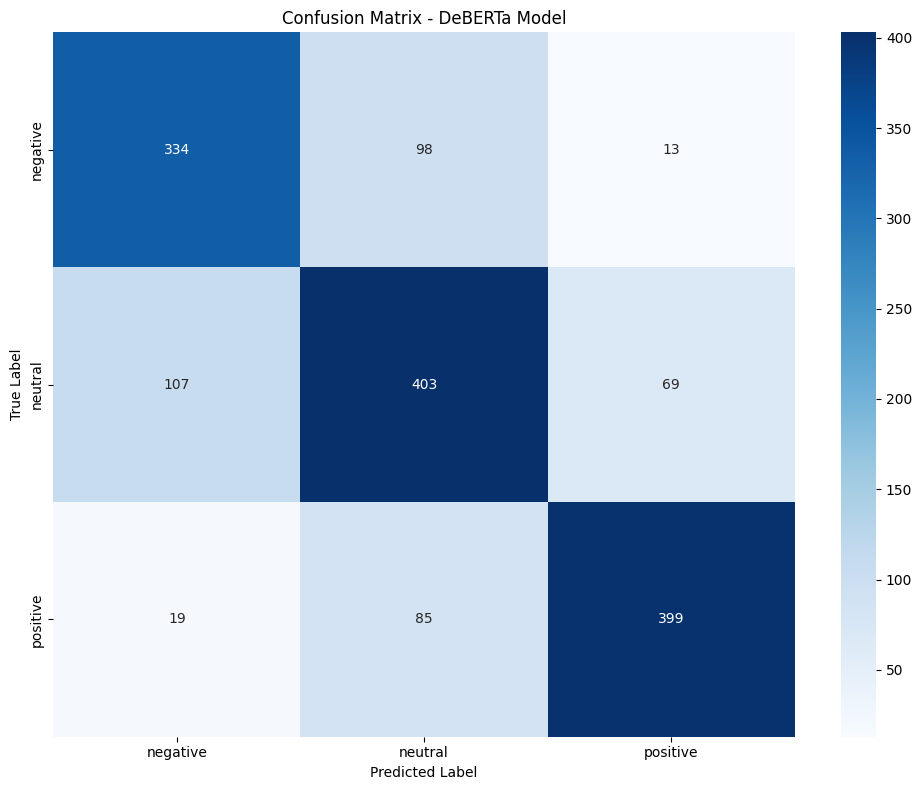


 Per-class Accuracy:
   - negative: 0.751 (334/445)
   - neutral: 0.696 (403/579)
   - positive: 0.793 (399/503)

 Overall Validation Accuracy: 0.7439


In [20]:
# Model evaluation
if 'sentiment' in train_df.columns:
    print(" Evaluating model on validation set...")
    print("="*40)
    
    # Evaluate on validation set
    eval_results = trainer.evaluate()
    
    print(" Validation Results:")
    for key, value in eval_results.items():
        if isinstance(value, float):
            print(f"   - {key}: {value:.4f}")
        else:
            print(f"   - {key}: {value}")
    
    # Get predictions on validation set
    predictions = trainer.predict(val_dataset)
    y_pred = np.argmax(predictions.predictions, axis=1)
    y_true = y_val
    
    # Detailed classification report
    print("\n Detailed Classification Report:")
    print("="*40)
    target_names = [id2label[i] for i in range(len(id2label))]
    report = classification_report(y_true, y_pred, target_names=target_names)
    print(report)
    
    # Confusion matrix
    print("\n Confusion Matrix:")
    print("="*25)
    cm = confusion_matrix(y_true, y_pred)
    
    # Create confusion matrix visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix - DeBERTa Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Per-class accuracy
    print("\n Per-class Accuracy:")
    print("="*25)
    for i, sentiment in enumerate(target_names):
        class_correct = cm[i, i]
        class_total = cm[i, :].sum()
        class_accuracy = class_correct / class_total if class_total > 0 else 0
        print(f"   - {sentiment}: {class_accuracy:.3f} ({class_correct}/{class_total})")
    
    # Overall accuracy
    overall_accuracy = accuracy_score(y_true, y_pred)
    print(f"\n Overall Validation Accuracy: {overall_accuracy:.4f}")
else:
    print(" Cannot evaluate model without sentiment labels")

In [21]:
# Generate predictions on test set
if 'sentiment' in train_df.columns:
    print(" Generating predictions on test set...")
    print("="*40)
    
    # Get predictions on test set
    test_predictions = trainer.predict(test_dataset)
    test_pred_labels = np.argmax(test_predictions.predictions, axis=1)
    
    # Convert numerical predictions back to sentiment labels
    test_pred_sentiments = [id2label[pred] for pred in test_pred_labels]
    
    # Add predictions to test dataframe
    test_df['predicted_sentiment'] = test_pred_sentiments
    
    print(f" Generated {len(test_pred_sentiments)} predictions")
    
    # Show prediction distribution
    pred_dist = pd.Series(test_pred_sentiments).value_counts()
    print(f"\n Test Predictions Distribution:")
    for sentiment, count in pred_dist.items():
        percentage = (count / len(test_pred_sentiments)) * 100
        print(f"   - {sentiment}: {count} ({percentage:.1f}%)")
    
    # Show some sample predictions
    print(f"\n Sample Predictions:")
    print("="*30)
    sample_indices = np.random.choice(len(test_df), size=5, replace=False)
    for i, idx in enumerate(sample_indices, 1):
        text = test_df.iloc[idx]['text'][:100]
        pred = test_df.iloc[idx]['predicted_sentiment']
        print(f"{i}. Text: {text}...")
        print(f"   Prediction: {pred}")
        print()
else:
    print(" Cannot generate predictions without trained model")

 Generating predictions on test set...


 Generated 5205 predictions

 Test Predictions Distribution:
   - neutral: 2102 (40.4%)
   - positive: 1658 (31.9%)
   - negative: 1445 (27.8%)

 Sample Predictions:
1. Text: (that was a  btw -_-)...
   Prediction: neutral

2. Text:  so give me a quick update grace, you`ve quit the foodland job and you start at JB`s tomorrow full t...
   Prediction: positive

3. Text:  that`s a lot of mangoes.. haha  baka naglilihi ka ahh?? haha  joke lang carmen...
   Prediction: positive

4. Text: Another crappy todo list app I have to delete. I dont understand, all I want is a simple to do list!...
   Prediction: negative

5. Text: I want it BACK NOW!: http://bit.ly/PP1WZ...
   Prediction: negative



In [22]:
# Create Kaggle submission file
if 'sentiment' in train_df.columns and 'predicted_sentiment' in test_df.columns:
    print(" Creating Kaggle submission file...")
    print("="*35)
    
    # Prepare submission dataframe
    # Assuming test.csv has an 'id' column for Kaggle submission
    if 'id' in test_df.columns:
        submission = pd.DataFrame({
            'id': test_df['id'],
            'sentiment': test_df['predicted_sentiment']
        })
    else:
        # If no id column, create one
        submission = pd.DataFrame({
            'id': range(len(test_df)),
            'sentiment': test_df['predicted_sentiment']
        })
        print(" No 'id' column found in test data, created sequential IDs")
    
    # Save submission file
    submission_filename = 'deberta_sentiment_submission.csv'
    submission.to_csv(submission_filename, index=False)
    
    print(f"Submission file saved as '{submission_filename}'")
    print(f" Submission shape: {submission.shape}")
    print(f"\n Submission file preview:")
    print(submission.head(10))
    
    # Submission statistics
    print(f"\n Submission Statistics:")
    print("="*30)
    submission_dist = submission['sentiment'].value_counts()
    for sentiment, count in submission_dist.items():
        percentage = (count / len(submission)) * 100
        print(f"   - {sentiment}: {count} ({percentage:.1f}%)")
    
    print(f"\n Model Summary:")
    print("="*20)
    print(f"   - Model: {MODEL_NAME}")
    print(f"   - Validation Accuracy: {overall_accuracy:.4f}")
    print(f"   - Training Epochs: {NUM_EPOCHS}")
    print(f"   - Max Length: {MAX_LENGTH}")
    print(f"   - Batch Size: {BATCH_SIZE}")
    print(f"   - Learning Rate: {LEARNING_RATE}")
    
    print(f"\n Ready for Kaggle submission!")
    print(f" Submit file: {submission_filename}")
else:
    print(" Cannot create submission file without predictions")

 Creating Kaggle submission file...
Submission file saved as 'deberta_sentiment_submission.csv'
 Submission shape: (5205, 2)

 Submission file preview:
   id sentiment
0   0  positive
1   1   neutral
2   2   neutral
3   3   neutral
4   4  positive
5   5  positive
6   6   neutral
7   7  negative
8   8  positive
9   9  negative

 Submission Statistics:
   - neutral: 2102 (40.4%)
   - positive: 1658 (31.9%)
   - negative: 1445 (27.8%)

 Model Summary:
   - Model: microsoft/deberta-v3-base
   - Validation Accuracy: 0.7439
   - Training Epochs: 3
   - Max Length: 512
   - Batch Size: 8
   - Learning Rate: 2e-05

 Ready for Kaggle submission!
 Submit file: deberta_sentiment_submission.csv
